In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from sklearn.svm import SVC

In [2]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()
df.head()
df.dtypes

num_stars                    int64
single_planet_exosystem       bool
discoverymethod             object
disc_year                    int64
disc_facility               object
                            ...   
sy_kmagerr1                float64
sy_kmagerr2                float64
sy_gaiamag                 float64
sy_gaiamagerr1             float64
sy_gaiamagerr2             float64
Length: 63, dtype: object

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['discoverymethod', 'disc_facility', 'pl_bmassprov', 'st_metratio'], dtype='object')


In [4]:
#Converting Strings to numbers
dictMethod = {}
count = 0
for value in df['discoverymethod']:
    if value not in dictMethod:
        dictMethod[value] = count
        count+=1
df['discoverymethod'] = df['discoverymethod'].map(dictMethod)

dictFac = {}
count2 = 0
for value in df['disc_facility']:
    if value not in dictFac:
        dictFac[value] = count2
        count2+=1
df['disc_facility'] = df['disc_facility'].map(dictFac)

#df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 0, False: 1})

dictBmass = {}
count3 = 0
for value in df['pl_bmassprov']:
    if value not in dictBmass:
        dictBmass[value] = count3
        count3+=1
df['pl_bmassprov'] = df['pl_bmassprov'].map(dictBmass)

dictMratio = {}
count4 = 0
for value in df['st_metratio']:
    if value not in dictMratio:
        dictMratio[value] = count4
        count4+=1
df['st_metratio'] = df['st_metratio'].map(dictMratio)

df.dtypes

num_stars                    int64
single_planet_exosystem       bool
discoverymethod              int64
disc_year                    int64
disc_facility                int64
                            ...   
sy_kmagerr1                float64
sy_kmagerr2                float64
sy_gaiamag                 float64
sy_gaiamagerr1             float64
sy_gaiamagerr2             float64
Length: 63, dtype: object

In [5]:
attr = df.drop('single_planet_exosystem', axis=1)
target = df['single_planet_exosystem']

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()


,num_stars,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,6.594629,-10.419886,-0.435683,-2.394081,-0.054118,15.699378,16.735310,-17.231348,0.018016,17.188149,...,0.478825,-3.941650,-0.692306,0.692306,-3.406166,-0.044412,0.044412,-3.910218,3.401583,-3.401583
1,3.168357,-5.128390,-6.159879,-2.267215,-0.054118,-0.058864,-0.033834,0.034695,0.018016,-0.071702,...,0.481777,-3.596680,-0.692306,0.692306,-3.658100,0.022152,-0.022152,-3.639492,0.735722,-0.735722
2,3.168357,-5.128390,-3.749691,-2.140348,-0.054118,-0.077648,-0.033834,0.034695,0.018016,-0.200901,...,0.481777,-3.596680,-0.692306,0.692306,-3.658100,0.022152,-0.022152,-3.639492,0.735722,-0.735722
3,-0.257915,0.163106,1.070684,-2.013482,-0.054118,-0.067218,-0.033834,0.034695,0.018016,-0.135669,...,0.481986,-2.262638,-0.105224,0.105224,-3.410028,-0.066599,0.066599,-2.639947,0.513506,-0.513506
4,-0.257915,0.163106,1.371957,-2.013482,-0.054118,-0.053183,-0.033834,0.034695,0.018016,-0.075132,...,0.481986,-2.262638,-0.105224,0.105224,-3.410028,-0.066599,0.066599,-2.639947,0.513506,-0.513506


In [7]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 7, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

2288    False
2172     True
2349     True
343      True
4000     True
Name: single_planet_exosystem, dtype: bool

In [8]:
# import SVM classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier 
svc=SVC() 

# fit classifier to training set
svc.fit(attr_train,target_train)


# make predictions on test set
target_pred=svc.predict(attr_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Model accuracy score with default hyperparameters: 0.8262

Classification Report
              precision    recall  f1-score   support

       False       0.88      0.72      0.79       358
        True       0.79      0.92      0.85       413

    accuracy                           0.83       771
   macro avg       0.84      0.82      0.82       771
weighted avg       0.83      0.83      0.82       771


Confusion Matrix
[[259  99]
 [ 35 378]]


In [5]:
import numpy as np
matrix = np.array([
    [162, 266], 
    [41, 456]
])

import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, 'Alone'), Text(0, 1.5, 'Not Alone')]

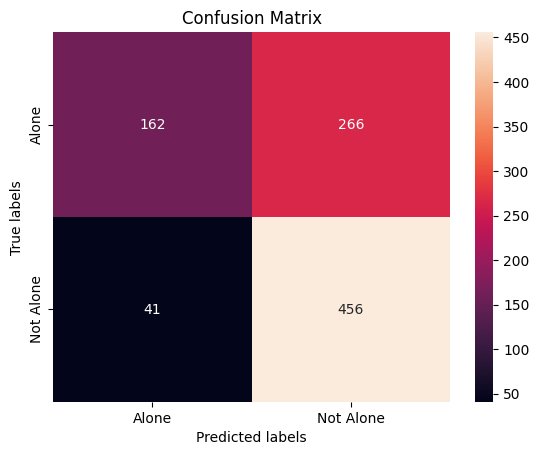

In [6]:
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(['Alone', 'Not Alone'])
ax.yaxis.set_ticklabels(['Alone', 'Not Alone'])